In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

# Implementación regresión robusta

Lo que haremos es corromper los datos del dataset de felicidad agregando valores atipicos (outliers) y poder experimentar y aplicar nuestras regresiones robustas.

Primero, importamos nuestras librerias.


In [4]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

warnings.simplefilter("ignore")

import seaborn as sns

Función de lectura y partición de datos:


In [5]:
def read_split_data(data, X_columns, y_column, test_size, rs):
    dataset = pd.read_csv(data)
    X = dataset[X_columns]
    y = dataset[[y_column]]
    return train_test_split(X, y, test_size=test_size, random_state=rs)

Llamamos a nuestra función `read_split_data`


In [6]:
input_col = [
    "gdp",
    "family",
    "lifexp",
    "freedom",
    "generosity",
    "corruption",
    "dystopia",
]
target = "score"

X_train, X_test, y_train, y_test = read_split_data(
    data="../data/felicidad_corrupt.csv",
    X_columns=input_col,
    y_column=target,
    test_size=0.3,
    rs=42,
)

Instancia de nuestros modelos:


In [11]:
estimadores = {
    "SVR": SVR(gamma="auto", C=1.0, epsilon=0.1),
    "RANSAC": RANSACRegressor(),
    "Huber": HuberRegressor(epsilon=1.35, max_iter=10_000),
}

1 - **SVM (Suppot Vector Machine)**: Con el parámetro C podemos controlar la penalización por error en la clasificación. Si C tiene valores amplios entonces, se penaliza de forma más estricta los errores, mientras que si escogemos un C pequeño seremos menos estrictos con los errores. En otras palabras, si C es pequeño aumenta el sesgo y disminuye la varianza del modelo.

2 - **RANSAC**: Al ser un meta estimador, podemos pasarle como parámetros diferentes estimadores, para nuestro caso vamos a trabajar de una forma genenérica.

3 - **HUBER**: El valor de epsilon es 1.35. Utilizamos este valor ya que se ha demostrado que logra un 95% de eficiencia estadística.


Entrenamos cada modelo y predecimos resultados:


SVR MSE: 0.0067738484
RANSAC MSE: 9.41e-08
Huber MSE: 1.036e-07


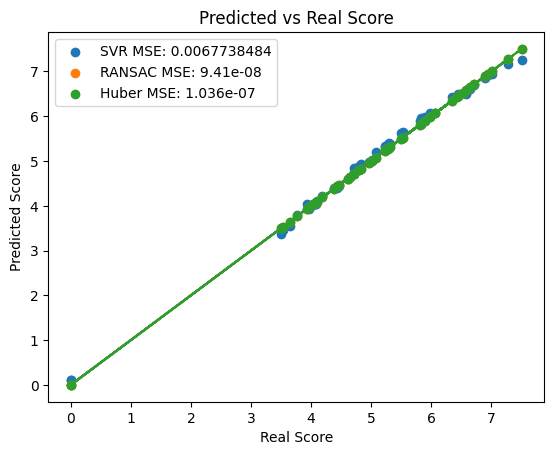

In [12]:
plt.ylabel("Predicted Score")
plt.xlabel("Real Score")
plt.title("Predicted vs Real Score")

for name, estimador in estimadores.items():
    # Entrenamos
    estimador.fit(X_train, y_train)
    # Predecimos
    predictions = estimador.predict(X_test)
    # Medimos
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} MSE: {round(mse, 10)}")
    print("=" * 50)
    plt.scatter(y_test, predictions, label=f"{name} MSE: {round(mse, 10)}")
    plt.plot(predictions, predictions, "--")

plt.legend()
plt.show()

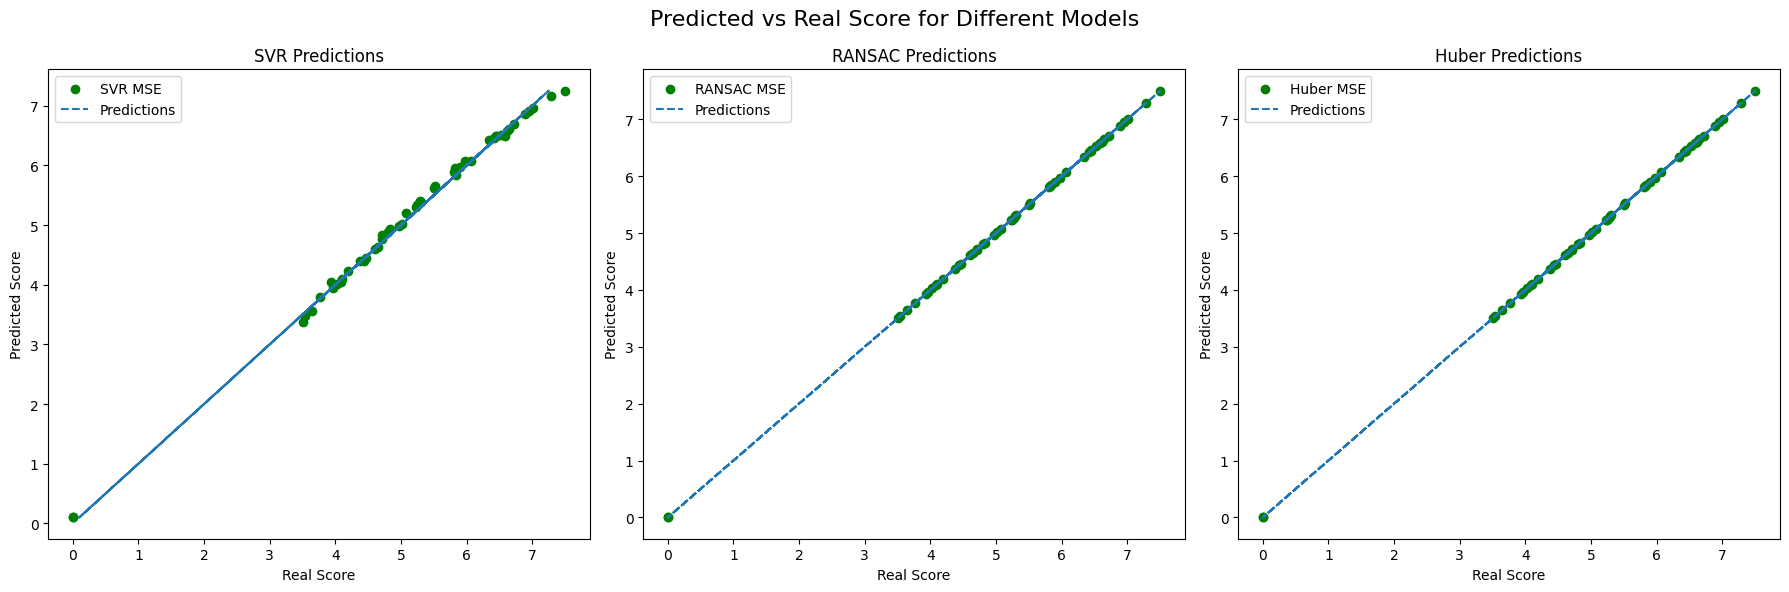

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 1 fila, 3 columnas

for id, (name, estimador) in enumerate(estimadores.items()):
    estimador.fit(X_train, y_train)
    predictions = estimador.predict(X_test)
    axes[id].set_title(f"{name} Predictions")
    axes[id].set_ylabel("Predicted Score")
    axes[id].set_xlabel("Real Score")
    axes[id].scatter(y_test, predictions, label=f"{name} MSE", color="green")
    axes[id].plot(predictions, predictions, "--", label="Predictions")
    axes[id].legend()
plt.suptitle("Predicted vs Real Score for Different Models", fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()